# 배터리 데이터를 이용한 복습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽어와서 살펴보기(EDA)

In [ ]:
# 데이터 읽어오기
train_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\배터리 수명 예측\train.csv')
test_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\배터리 수명 예측\test.csv')

In [ ]:
# target, feature 확인
# 데이터 종류 => 카테고리, 연속된 숫자
train_df.head(3)

In [ ]:
sns.pairplot(train_df, hue='Class')
plt.show()

In [ ]:
# 데이터가 양품? => 결측이 있나
train_df.isna().sum() / len(train_df) * 100

In [ ]:
test_df.isna().sum() / len(test_df) * 100

In [ ]:
# 결측값 채우기 => 평균
for col in ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']:
    train_df.loc[train_df[col].isna(), col] = train_df[col].mean()
    test_df.loc[test_df[col].isna(), col] = train_df[col].mean()

In [17]:
# 결측값 채우기 => 평균
# fillna 이용
train_df = train_df.fillna( train_df.mean(numeric_only=True) )
test_df = test_df.fillna( train_df.mean(numeric_only=True) )

## Feature Engineering
- 데이터가 아닌 것이 있으면 데이터로 바꿔줌
- 숫자 => 스케일링
- 카테고리 => 인코딩

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [28]:
feature_list = ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']

sc = StandardScaler()
sc.fit( train_df[feature_list] )
X = pd.DataFrame( sc.transform( train_df[feature_list] ), columns=feature_list )
test_X = pd.DataFrame( sc.transform( test_df[feature_list] ), columns=feature_list )

## 훈련용 데이터와 검증용 데이터로 나누어서 하이퍼 파라미터 찾아보기
- random forest이용

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [29]:
y = train_df['Class']
train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=17,
                                                      stratify=y)

In [31]:
params = {'max_depth' : [3, 10, 20],
        'min_samples_leaf' : [1, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier( random_state=17 ), params, cv=5)
grid_rf.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [3, 10, 20],
                         'min_samples_leaf': [1, 10, 20]})

## 훈련하고, 검증, 예측

In [33]:
grid_rf.score( valid_x, valid_y )

0.6311333333333333

In [43]:
result = test_df[['ID']].copy()
result['Class'] = grid_rf.predict(test_X)
#result.to_csv(r'파일경로\파일명.csv', index=False)

# 당뇨병

# 회귀 문제

In [47]:
from sklearn.datasets import load_diabetes

In [52]:
temp = load_diabetes()
diabetes_df = pd.DataFrame( temp['data'], columns=temp['feature_names'] )
diabetes_df['target'] = temp['target']

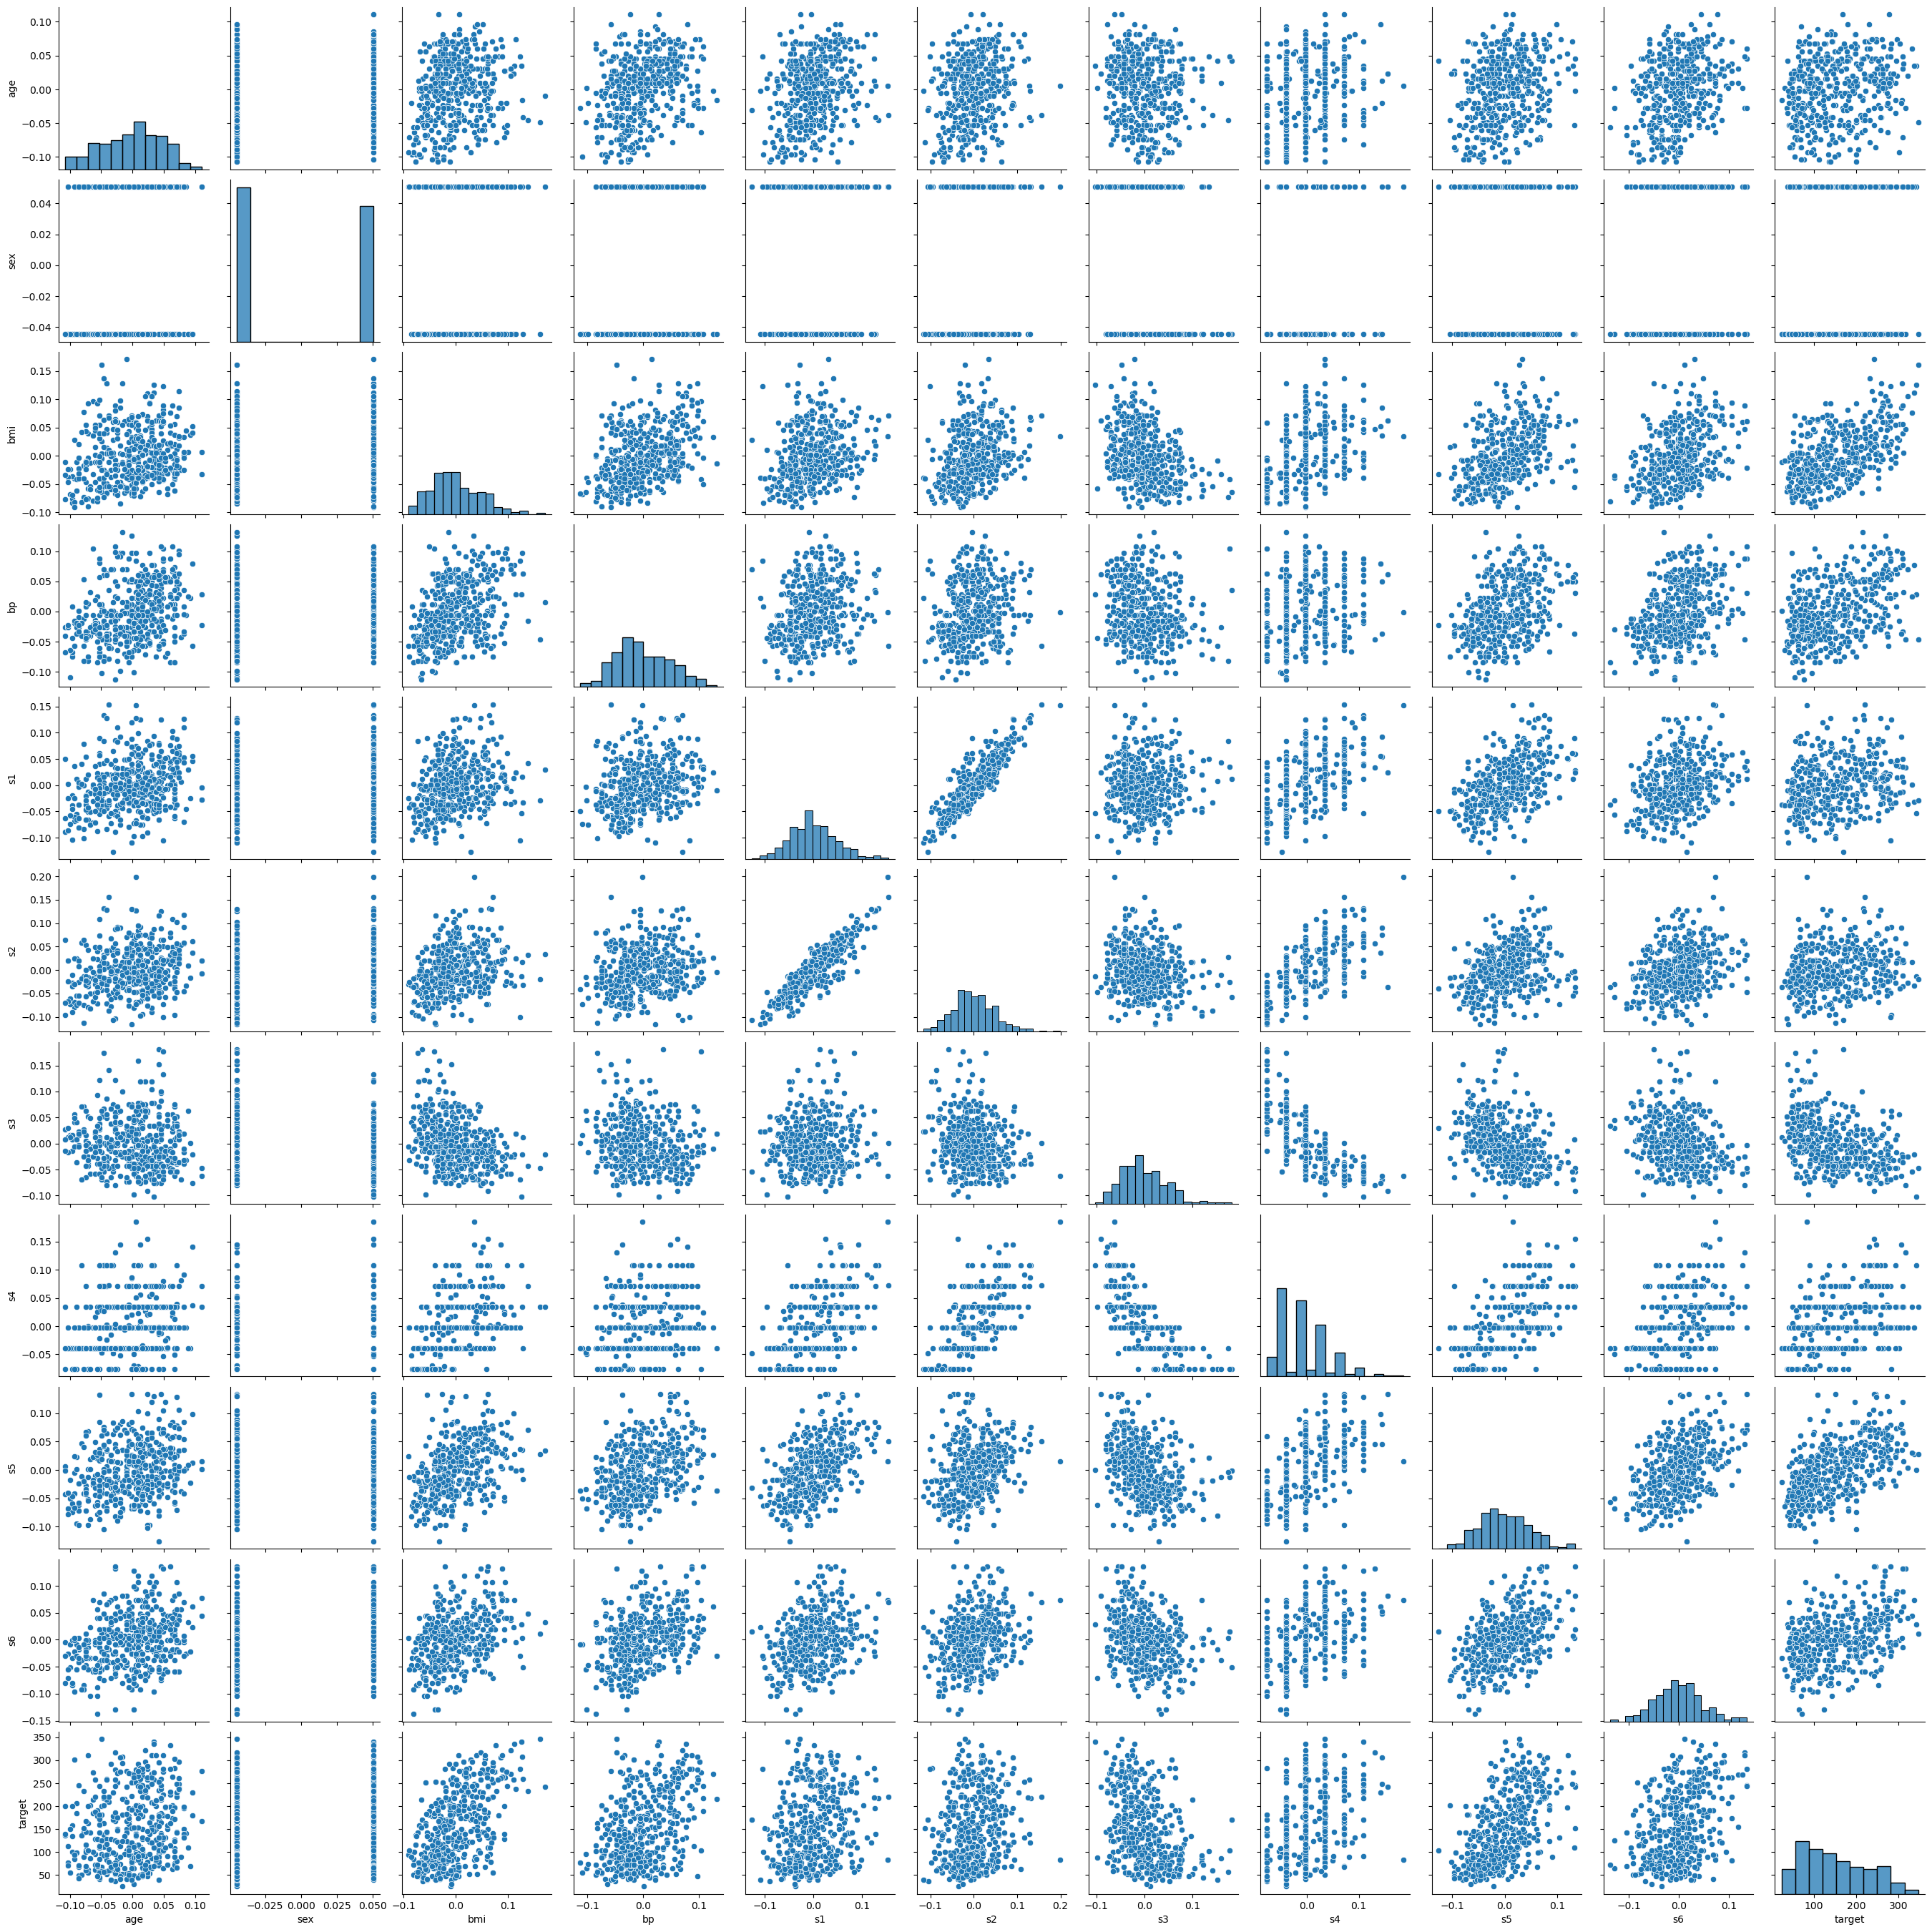

In [54]:
sns.pairplot( diabetes_df )
plt.show()

In [ ]:
# LinearRgression
# target과 feature간에 선형관계가 있다고 가정
# y = a1x1 + a2x2 + a3x3 + ... + b
# 가정1 : x와 y가 선형관계다
# 가정2 : 예측값의 오차가 y에 독립적이다
# ... => 통계적 가정들 ML에서는 신경쓰지 않음
# 그래도 지켜져야 하는 것! feature들이 서로 독립적이어야 함(다중공선성 문제 발생!)

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [59]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df['target']

train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=17)

In [62]:
lr = LinearRegression()
lr.fit(train_x, train_y)
lr.coef_

array([  31.55537643, -366.71859113,  490.82617701,  305.01986056,
        -12.9629019 , -211.37683435, -221.56778356,  219.12712275,
        497.68549475,   62.88281073])

In [71]:
from sklearn.metrics import mean_squared_error

# RMSE
mean_squared_error(valid_y,  lr.predict(valid_x) ) ** 0.5

55.15958738748603

In [ ]:
# feature가 서로 연관?! => corr

diabetes_df.corr()

In [78]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

for ix, col in enumerate( X.columns ):
    print(col, variance_inflation_factor(X, ix))

age 1.2173065138070072
sex 1.2780710154103625
bmi 1.5094373738445481
bp 1.4594277776838307
s1 59.202510134318615
s2 39.1933699727707
s3 15.402156007513453
s4 8.890986360329626
s5 10.075967132038336
s6 1.4846226073834825


In [82]:
X2 = X.drop('s1', axis=1)

In [83]:
for ix, col in enumerate( X2.columns ):
    print(col, variance_inflation_factor(X2, ix))

age 1.2168924990717664
sex 1.2750486364396652
bmi 1.5023204346436043
bp 1.4574130684546214
s2 2.9265353553181814
s3 3.7368898006586306
s4 7.818670164713717
s5 2.1728652440836487
s6 1.48441026744797


In [84]:
train_x, valid_x, train_y, valid_y = train_test_split(X2, y,
                                                      test_size=0.3,
                                                      random_state=17)

lr2 = LinearRegression()
lr2.fit(train_x, train_y)

LinearRegression()

In [85]:
lr2.coef_

array([  31.54375294, -366.78738218,  490.80642751,  304.91319266,
       -221.89146876, -227.19598614,  217.98859047,  493.12749285,
         62.86777818])

In [87]:
lr2.score( valid_x, valid_y )

0.4647301304507624

In [88]:
mean_squared_error( valid_y, lr2.predict(valid_x) ) ** 0.5

55.189428230691256

In [89]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

In [93]:
params = {'n_neighbors': [5, 10, 15, 20, 30]}
grid_knn = GridSearchCV(KNeighborsRegressor(), params, cv=5, 
                        scoring='neg_root_mean_squared_error')
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 30]},
             scoring='neg_root_mean_squared_error')

In [94]:
grid_knn.cv_results_['mean_test_score']

array([-60.85992736, -59.55787884, -57.98524969, -58.31011599,
       -58.5857419 ])

In [95]:
mean_squared_error( valid_y, grid_knn.predict(valid_x) ) ** 0.5

53.35071427310315

# 자전거 대여 예측

In [97]:
train_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\train.csv')
test_df = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\2025 수업\DA양성과정 ML\test.csv')

## EDA

In [102]:
# 데이터가 아닌 것들 : 'datetime'
# 카테고리 데이터 : 'season', 'holiday', 'workingday', 'weather'
# 연속된 숫자 데이터 : 'temp', 'atemp', 'humidity', 'windspeed',

train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

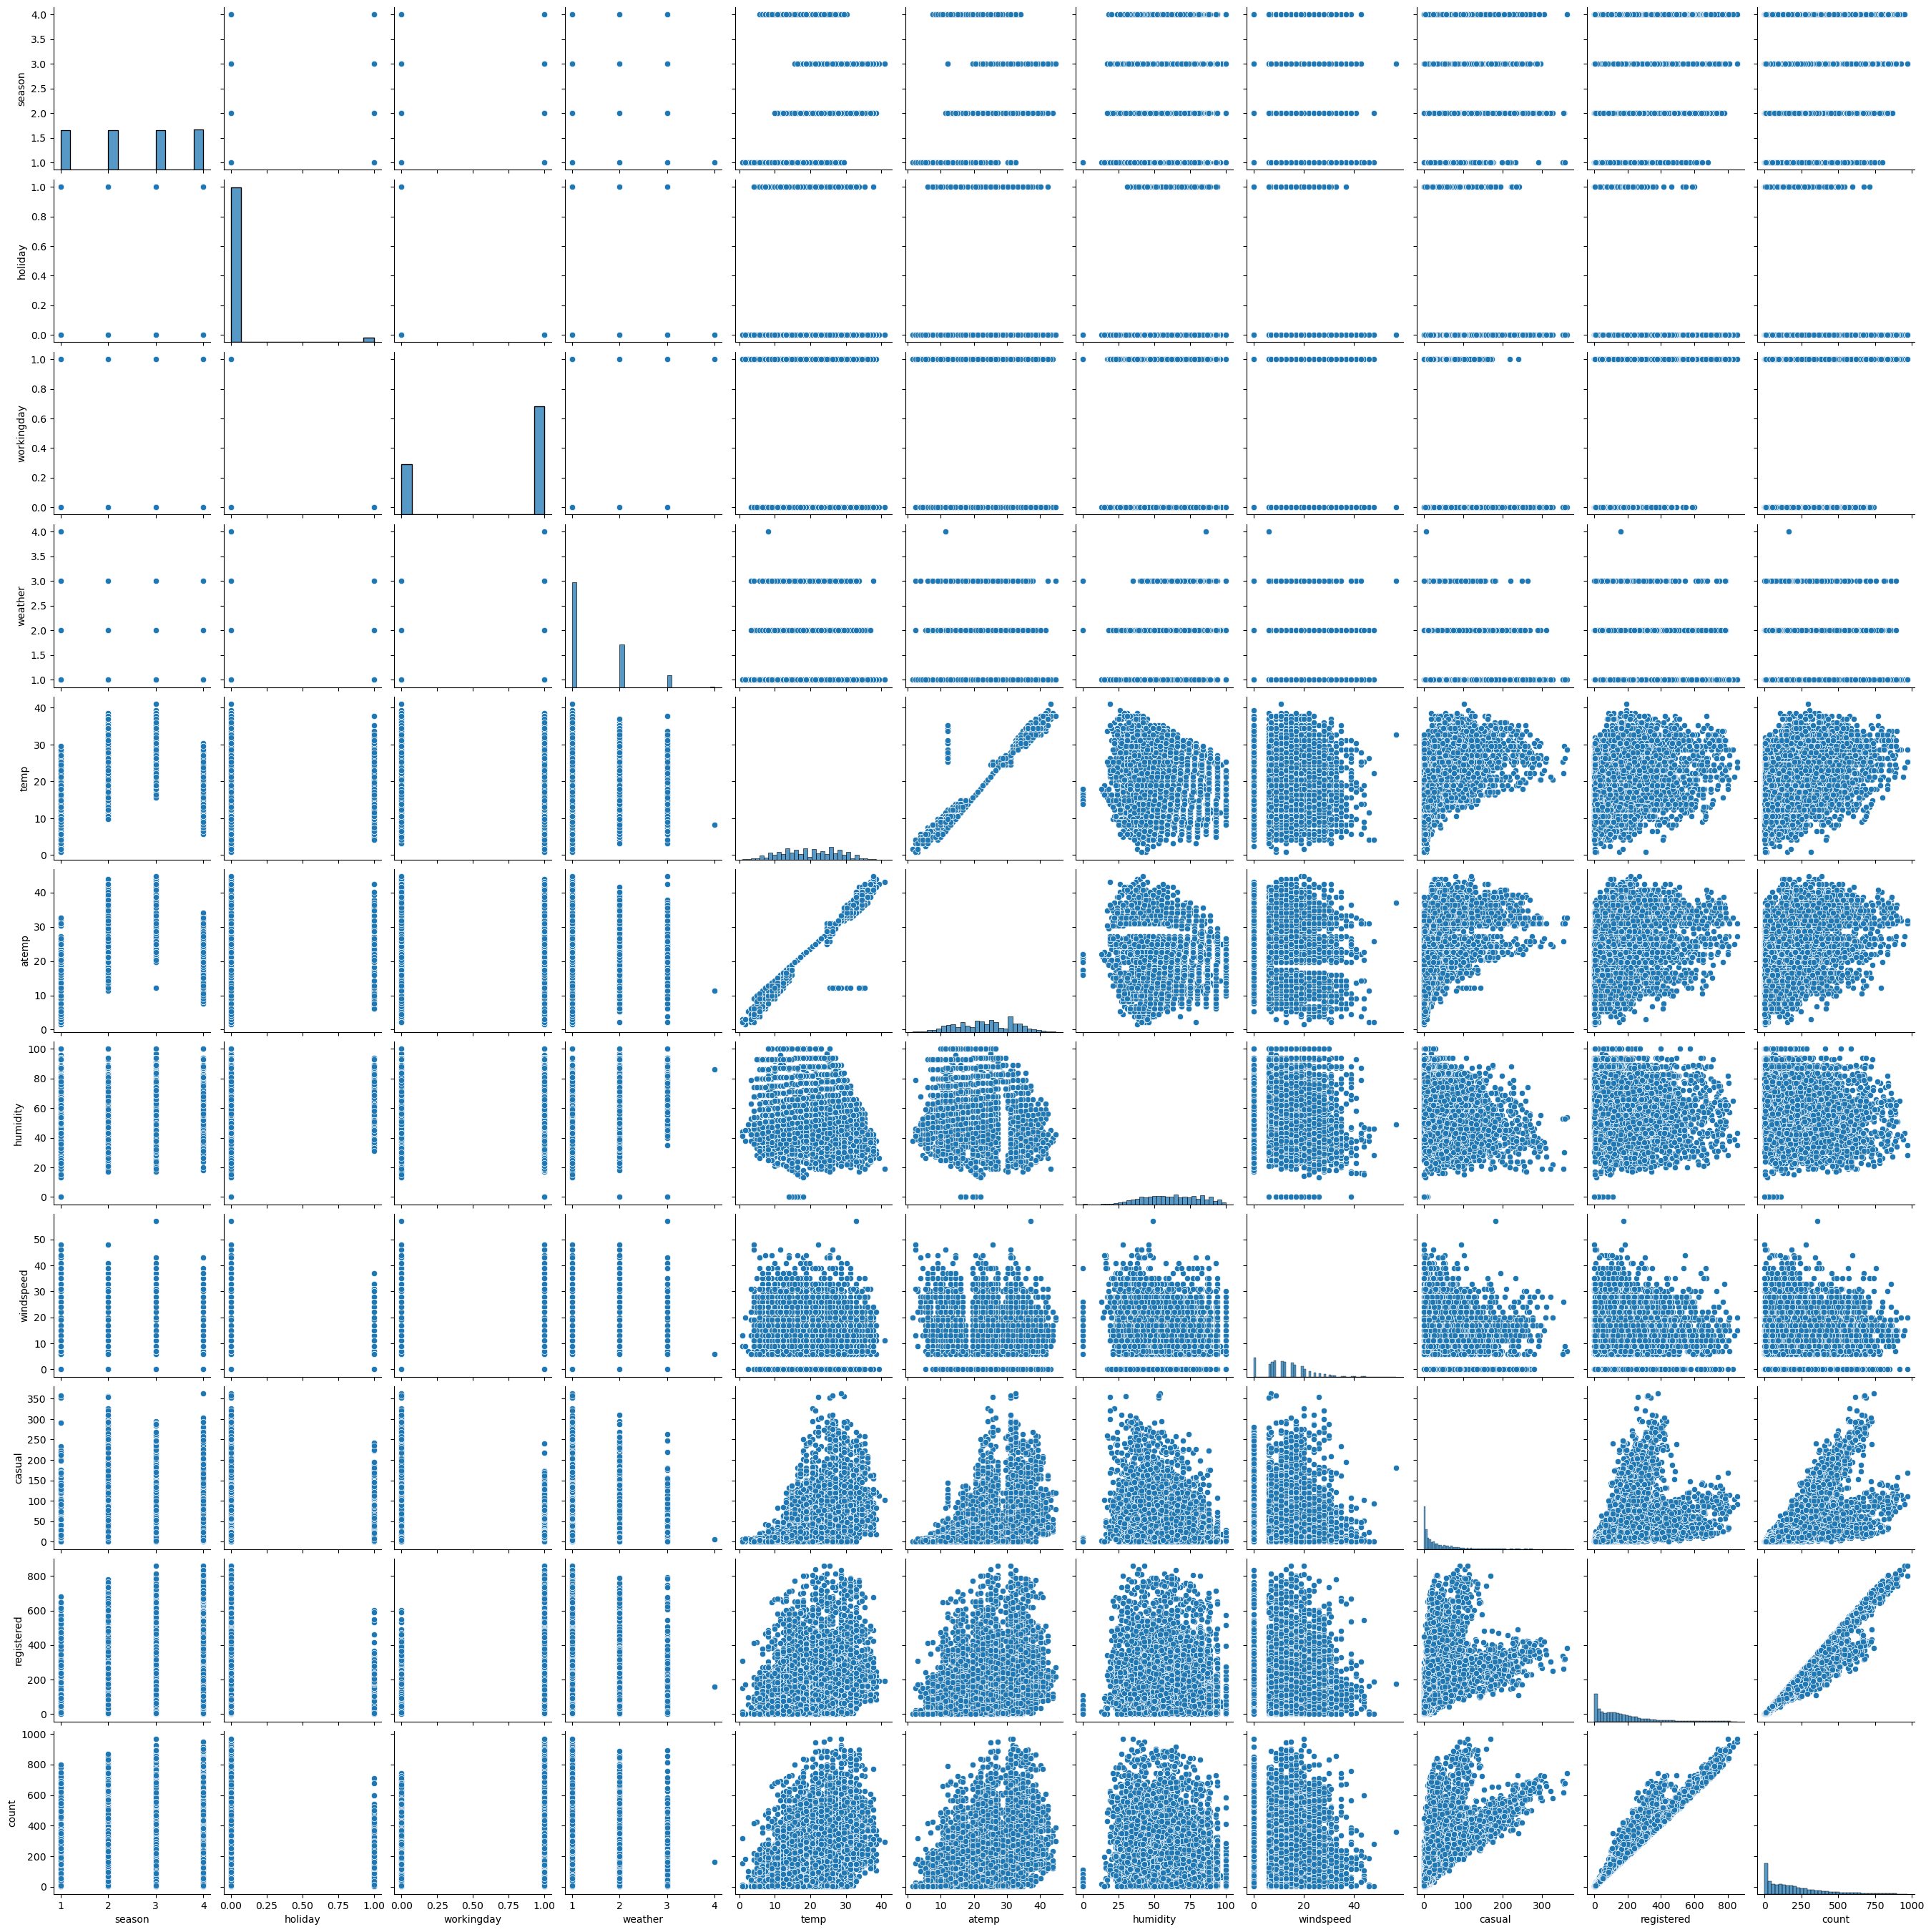

In [104]:
sns.pairplot( train_df )
plt.show()

In [105]:
train_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Feature Engineering

In [118]:
# datetime을 데이터로 추출하기

train_df['year'] = pd.to_datetime( train_df['datetime'] ).dt.year
train_df['month'] = pd.to_datetime( train_df['datetime'] ).dt.month
train_df['day'] = pd.to_datetime( train_df['datetime'] ).dt.day
train_df['hour'] = pd.to_datetime( train_df['datetime'] ).dt.hour

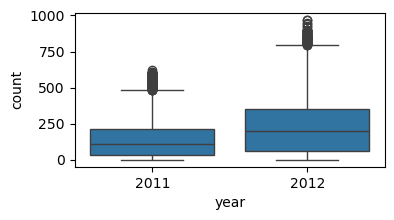

In [119]:
plt.figure(figsize=(4, 2))
sns.boxplot(train_df, x='year', y='count')
plt.show()

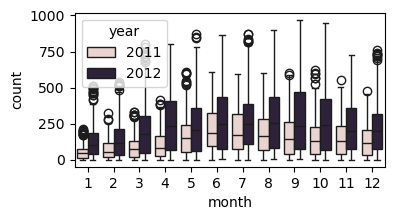

In [121]:
plt.figure(figsize=(4, 2))
sns.boxplot(train_df, x='month', y='count', hue='year')
plt.show()

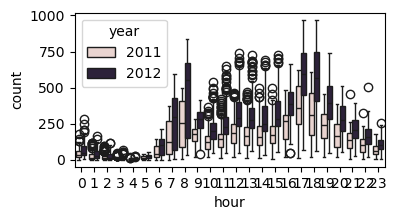

In [124]:
plt.figure(figsize=(4, 2))
sns.boxplot(train_df, x='hour', y='count', hue='year')
plt.show()

In [128]:
# year : 카테고리
# month : 연속된 숫자
# hour : 연속된 숫자 => 삼각함수로 변형!

train_df['sin_hour'] = np.sin( (train_df['hour'] / 24) * 2 * np.pi )
train_df['cos_hour'] = np.cos( (train_df['hour'] / 24) * 2 * np.pi )

In [129]:
test_df['year'] = pd.to_datetime( test_df['datetime'] ).dt.year
test_df['month'] = pd.to_datetime( test_df['datetime'] ).dt.month
test_df['hour'] = pd.to_datetime( test_df['datetime'] ).dt.hour

test_df['sin_hour'] = np.sin( (test_df['hour'] / 24) * 2 * np.pi )
test_df['cos_hour'] = np.cos( (test_df['hour'] / 24) * 2 * np.pi )

In [136]:
# 연속된 숫자 : 'temp', 'humidity', 'windspeed','sin_hour', 'cos_hour'
# 카테고리    : 'season', 'holiday', 'workingday', 'weather', 'year'

# 스케일링
from sklearn.preprocessing import StandardScaler

number_features = ['temp', 'humidity', 'windspeed','sin_hour', 'cos_hour']
sc = StandardScaler()
sc.fit( train_df[ number_features ] )
X = pd.DataFrame( sc.transform( train_df[ number_features] ), columns=number_features )
test_X = pd.DataFrame( sc.transform( test_df[ number_features] ), columns=number_features )

In [141]:
# 인코딩
from sklearn.preprocessing import OneHotEncoder

cate_features = ['season', 'holiday', 'workingday', 'weather', 'year']
one_hot = OneHotEncoder( drop='first', sparse_output=False)
one_hot.fit(train_df[cate_features])
X[ one_hot.get_feature_names_out() ] = one_hot.transform( train_df[cate_features] )
test_X[ one_hot.get_feature_names_out() ] = one_hot.transform( test_df[cate_features] )

## ML모델 사용해서 예측

In [143]:
y = train_df['count']
train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=17)

In [144]:
# 선형회귀 모델
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [145]:
lr.score(valid_x, valid_y)

0.4925573951545211

In [147]:
mean_squared_error( valid_y, lr.predict(valid_x) ) ** 0.5

128.3498066010356

In [152]:
result1 = test_df[['datetime']].copy()
result1['count'] = lr.predict(test_X)
result1

datetime       count
0     2012-06-14 13:00  408.433556
1      2011-11-13 0:00   46.947773
2      2012-08-16 1:00  168.280432
3     2011-12-14 19:00  209.259642
4      2011-10-12 6:00   59.896508
...                ...         ...
3261   2012-01-16 5:00    8.396547
3262  2012-07-09 13:00  400.896259
3263   2012-05-01 9:00  230.514849
3264  2012-01-15 23:00   83.938868
3265  2011-05-07 18:00  283.024010

[3266 rows x 2 columns]

In [153]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

In [163]:
params = {'n_neighbors' : [3, 5, 10, 15, 20, 25]}

grid_knn = GridSearchCV( KNeighborsRegressor(), params, cv=5, 
                        scoring='neg_mean_squared_log_error', )
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_log_error')

In [155]:
grid_knn.best_params_

{'n_neighbors': 5}

In [156]:
grid_knn.score(valid_x, valid_y)

0.8131808500096919

In [158]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(valid_y, grid_knn.predict(valid_x)) ** 0.5

0.5614632776248789

In [159]:
result2 = test_df[['datetime']].copy()
result2['count'] = grid_knn.predict(test_X)
result2

datetime  count
0     2012-06-14 13:00  294.8
1      2011-11-13 0:00   68.8
2      2012-08-16 1:00   56.6
3     2011-12-14 19:00  251.6
4      2011-10-12 6:00  140.2
...                ...    ...
3261   2012-01-16 5:00   28.2
3262  2012-07-09 13:00  260.6
3263   2012-05-01 9:00  297.6
3264  2012-01-15 23:00   67.6
3265  2011-05-07 18:00  274.6

[3266 rows x 2 columns]

In [165]:
# random forest
from sklearn.ensemble import RandomForestRegressor

In [168]:
params = {'max_depth':[5, 10, 15, 20], 
        'min_samples_leaf':[1, 5, 10, 20]}

grid_rf = GridSearchCV( RandomForestRegressor(random_state=17), params, cv=5,
                       scoring='neg_mean_squared_log_error')
grid_rf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 20]},
             scoring='neg_mean_squared_log_error')

In [172]:
grid_rf.score( valid_x, valid_y ) * -1 **0.5

0.13653049060399744

In [174]:
from sklearn.metrics import r2_score
r2_score(valid_y, grid_rf.predict(valid_x))

0.9228351403067743